In [ ]:
from nbdev.showdoc import *
import numpy as np
import scipy
import sklearn
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pilot Results Analysis

Our first study examined whether people can detect *metaphor schema* -- not, that is, explicitly spelled out analogies like "our relationship has hit a dead end", but the existence of *unspecified* "mappings" between pairs of concepts, like LOVE and A JOURNEY.

60 participants recruited through Prolific collectively answered 600 questions comparing 40 pairs of concepts. 20 of the pairs were human generated to contain a metaphor. The remaining 20 were randomly generated. The basic question is: can people distinguish the randomly generated pairs from human generated pairs?

## Data Import
We'll first examine the relationship between the *mean* score given to each mapping and whether it was human generated.

In [ ]:
#| hide
raw_results = """6.14285714285714	6.4375	1.14285714285714	6	7.33333333333333	3.28571428571429	3.33333333333333	3.33333333333333	3.33333333333333	6.85714285714286	2.66666666666667	4.86666666666667	3.92857142857143	5.6875	5.6	4.23529411764706	2	6.73333333333333	6	2	2.53333333333333	3.4	3.2	4	3.38461538461538	8.8125	8.14285714285714	4.23076923076923	0.8	2.25	2.53333333333333	1.52941176470588	5.73333333333333	8.4	2.6875	2.6	8.93333333333333	7.11764705882353	2	4.71428571428571"""
numerical_results = np.array([float(n) for n in raw_results.split("\t")])
ground_truth_textual = ['real',
                'real',
                'real',
                'fake',
                'real',
                'fake',
                'real',
                'fake',
                'fake',
                'real',
                'fake',
                'real',
                'fake',
                'real',
                'real',
                'fake',
                'real',
                'real',
                'real',
                'fake',
                'fake',
                'fake',
                'fake',
                'fake',
                'fake',
                'real',
                'real',
                'real',
                'fake',
                'fake',
                'fake',
                'fake',
                'real',
                'real',
                'fake',
                'fake',
                'real',
                'real',
                'fake',
                'real']
ground_truth = np.array([10.0 if g == 'real' else 0.0 for g in ground_truth_textual])
# for future reference, here are the metaphors associated with each score
metaphor_battery = "Leadership and Cooking - How strong is the metaphor?	Inflation and a Sinking Ship - How strong is the metaphor?	Soccer and Nuclear Missiles - How strong is the metaphor?	The President and a Film Actor - How strong is the metaphor?	A Startup Company and Rock Climbing - How strong is the metaphor?	A Goldendoodle and a Racing Car - How strong is the metaphor?	Restaurants and College Classes - How strong is the metaphor?	Elvis and a Museum - How strong is the metaphor?	Olympic Athletes and Country Singer/Songwriters - How strong is the metaphor?	Video Games and Hallucinogenics - How strong is the metaphor?	The Internet and an Apartment Building - How strong is the metaphor?	A Pension and a Friend - How strong is the metaphor?	Politics and Ice Hockey - How strong is the metaphor?	Muscle Cars and Rhinoceros Beetles - How strong is the metaphor?	Navigating an Unfamiliar Place and Long Division - How strong is the metaphor?	Memory and Television - How strong is the metaphor?	Skyscrapers and Pringles Chips - How strong is the metaphor?	A City and the Human Mind - How strong is the metaphor?	Debt and Obesity - How strong is the metaphor?	Department Stores and Soccer Teams - How strong is the metaphor?	The Legal System and Jazz Music - How strong is the metaphor?	Clouds and Highways - How strong is the metaphor?	An All-Girls School and a Men's Basketball Team - How strong is the metaphor?	Baseball Catchers and Journalists - How strong is the metaphor?	A Film Actor and an Oil Boom Town - How strong is the metaphor?	The Armed Forces and an Ant Colony - How strong is the metaphor?	Casinos and Alcohol - How strong is the metaphor?	Graphic Design and Packing a Suitcase - How strong is the metaphor?	Musical Albums and Sea Urchins - How strong is the metaphor?	The Air Force and a Hedge Fund - How strong is the metaphor?	The Post Office and a Telescope - How strong is the metaphor?	An Elementary School and a Solar Eclipse - How strong is the metaphor?	Textbooks and Gold - How strong is the metaphor?	Writing a Book and Running a Marathon - How strong is the metaphor?	Canoeing and Rock Music - How strong is the metaphor?	Traditions and Chemistry - How strong is the metaphor?	Tropical Cyclones and Bad Moods - How strong is the metaphor?	Mosquitoes and Taxes - How strong is the metaphor?	Cartoons and Attorneys - How strong is the metaphor?	Currency and Fashion Contests - How strong is the metaphor?"
metaphor_battery = metaphor_battery.split("\t")
real_metaphors_idxs = np.where(ground_truth == 10)[0]
results_on_real = numerical_results[real_metaphors_idxs]
metaphor_battery_real = [metaphor_battery[i] for i in real_metaphors_idxs]
fake_metaphors_idxs = np.where(ground_truth == 0)[0]
results_on_fake = numerical_results[fake_metaphors_idxs]
metaphor_battery_fake = [metaphor_battery[i] for i in fake_metaphors_idxs]

## The Pearson Correlation between the mean score and ground truth

In [ ]:
import scipy.stats
pearson_correlation = scipy.stats.pearsonr(ground_truth, numerical_results)
print(f"{pearson_correlation =}")

pearson_correlation =PearsonRResult(statistic=0.6654383067213117, pvalue=2.8015990134566568e-06)


Text(0.5, 0.98, 'Average judgements assigned to real vs. fake metaphors')

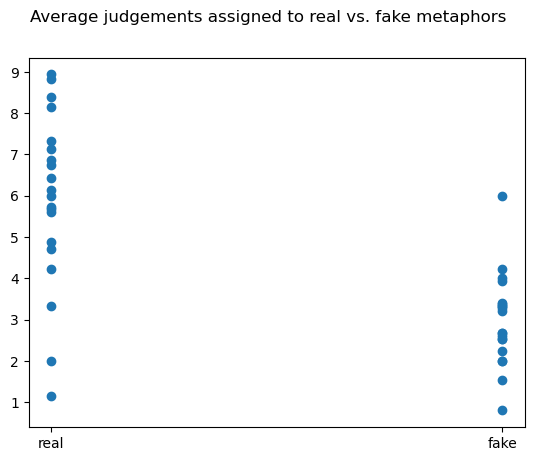

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ground_truth_textual, numerical_results)
plt.suptitle("Average judgements assigned to real vs. fake metaphors")

This plot shows the desired relationship pretty clearly. The audience *can* tell the difference between the average human generated metaphor and the average random "malaphor".

Curiously, there were many human-generated metaphors that scored really low, and a few computer-generated metaphors that scored fairly high -- though, on average, no higher than six. Let's sample some of these to see what happened:

In [ ]:
k = 3 # get k lowest ranked real metaphors
min_metaphor_idx = np.argpartition(results_on_real, k)[:k]
for mm in min_metaphor_idx:
    print(f"{metaphor_battery_real[mm]} with score {results_on_real[mm]}")

Soccer and Nuclear Missiles - How strong is the metaphor? with score 1.14285714285714
Skyscrapers and Pringles Chips - How strong is the metaphor? with score 2.0
Restaurants and College Classes - How strong is the metaphor? with score 3.33333333333333


These are admittedly pretty random. I had a specific idea in mind to relate them, but this didn't translate -- or perhaps the audience just wasn't thinking hard enough!

What are the *most* well ranked metaphors?

Here are the best-performing real metaphors:

In [ ]:
k = 3
max_metaphor_idx = np.argpartition(results_on_real, -k)[-k:]
for mm in max_metaphor_idx:
    print(f"{metaphor_battery_real[mm]} with score {results_on_real[mm]}")

Writing a Book and Running a Marathon - How strong is the metaphor? with score 8.4
Tropical Cyclones and Bad Moods - How strong is the metaphor? with score 8.93333333333333
The Armed Forces and an Ant Colony - How strong is the metaphor? with score 8.8125


And here are the best-performing fake metaphors:

In [ ]:
k = 3 
max_metaphor_idx = np.argpartition(results_on_fake, -k)[-k:]
for mm in max_metaphor_idx:
    print(f"{metaphor_battery_fake[mm]} with score {results_on_fake[mm]}")

Baseball Catchers and Journalists - How strong is the metaphor? with score 4.0
Memory and Television - How strong is the metaphor? with score 4.23529411764706
The President and a Film Actor - How strong is the metaphor? with score 6.0


The last one is especially good. The dice sometimes get lucky.

Just for fun, here are the absolute worst performing metaphors:

In [ ]:
k = 5
min_metaphor_idx = np.argpartition(numerical_results, k)[:k]
for mm in min_metaphor_idx:
    print(f"{metaphor_battery[mm]} with score {numerical_results[mm]}")

An Elementary School and a Solar Eclipse - How strong is the metaphor? with score 1.52941176470588
Musical Albums and Sea Urchins - How strong is the metaphor? with score 0.8
Soccer and Nuclear Missiles - How strong is the metaphor? with score 1.14285714285714
Skyscrapers and Pringles Chips - How strong is the metaphor? with score 2.0
Department Stores and Soccer Teams - How strong is the metaphor? with score 2.0


# Future Analyses
- [ ] Correlate the time spent in the survey with the individual metaphor fidelity


## Analysis on Full Results

In [ ]:
import pandas as pd
# df = pd.read_csv("../survey_results/pilot_results.tsv", sep = "\t")